In [26]:
import re
import pandas as pd
import string,time

# lecture du dataset
df = pd.read_csv("/kaggle/input/moviedata/movie_data.csv")

# check si duplicats
num_duplicates = df.duplicated().sum()
print(f"the number of duplicates in the the data", format(num_duplicates))

# drop les duplicats
df.drop_duplicates(inplace =True)
# print combien il y a de review négative et positive on voit que le dataset est bien équilibré
print(df['sentiment'].value_counts())

# print le nombre de valeur manquante dans le dataset on voit que il n'en a pas
print(df.isnull().sum().sort_values())

#remove tout les balises html
def remove_html_tag(text):
    pattern = re.compile("<.*?>")
    return pattern.sub( r'', text)

df['review']=df['review'].apply(remove_html_tag)

#remove les hashtag présent
def remove_hashtag(text):
    pattern = re.compile("#(\w+)")
    return pattern.sub( r'', text)

df['review']=df['review'].apply(remove_hashtag)

#remove les mention
def remove_mention(text):
    pattern = re.compile("@(\w+)")
    return pattern.sub( r'', text)

df['review']=df['review'].apply(remove_mention)

exclude  = string.punctuation

the number of duplicates in the the data 419
Positive    24884
Negative    24697
Name: sentiment, dtype: int64
review       0
sentiment    0
dtype: int64


In [27]:
#Realise de la correction sur les phrases mais non utilisé car prends beaucoup trop de temps 1 heure +

"""
from textblob import TextBlob
def correct_sentence_spelling(sentence):

    sentence = TextBlob(sentence)

    result = sentence.correct()
    return result

df['review']=df['review'].apply(correct_sentence_spelling)
"""

"\nfrom textblob import TextBlob\ndef correct_sentence_spelling(sentence):\n    \n    sentence = TextBlob(sentence)\n    \n    result = sentence.correct()\n    return result\n\ndf['review']=df['review'].apply(correct_sentence_spelling)\n"

In [28]:
!pip install inflect

In [29]:
import inflect
import re
# fonction remplacent tout les nombre par le valeur en string, exemple: 100 -> cent
def replace_numbers_with_strings(text):
    p = inflect.engine()

    def replace(match):
        number = int(match.group())
        return p.number_to_words(number)

    pattern = r'\b\d+\b'
    result = re.sub(pattern, replace, text)
    return result

df['review'] = df['review'].apply(replace_numbers_with_strings)

In [30]:
#tout en lowercase
df['review']=df['review'].str.lower()

In [32]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# un dictionnaire pour enlevé tout les utilisations d'accent dans la langue anglaise
mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot",
           "'cause": "because", "could've": "could have", "couldn't": "could not",
           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not",
           "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will",
           "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will",
           "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will",
           "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have",
           "i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have",
           "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not",
           "might've": "might have","mightn't": "might not","mightn't've": "might not have",
           "must've": "must have", "mustn't": "must not", "mustn't've": "must not have",
           "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
           "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would",
           "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have",
           "she's": "she is", "should've": "should have", "shouldn't": "should not",
           "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is",
           "that'd": "that would", "that'd've": "that would have", "that's": "that is",
           "there'd": "there would", "there'd've": "there would have", "there's": "there is",
           "here's": "here is","they'd": "they would", "they'd've": "they would have",
           "they'll": "they will", "they'll've": "they will have", "they're": "they are",
           "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would",
           "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have",
           "we're": "we are", "we've": "we have", "weren't": "were not",
           "what'll": "what will", "what'll've": "what will have","what're": "what are",
           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have",
           "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will",
           "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is",
           "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", 
           "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have",
           "y'all're": "you all are","y'all've": "you all have","you'd": "you would",
           "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
           "you're": "you are", "you've": "you have" }

stop = stopwords.words('english')
wl = WordNetLemmatizer()


In [33]:
import nltk
from nltk.corpus import stopwords
#download le corpus wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#unzip le file download parce que sinon c'est non utilisable

In [34]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
replace /usr/share/nltk_data/corpora/wordnet/lexnames? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [35]:
import nltk
nltk.download('wordnet')
from bs4 import BeautifulSoup
import re,string,unicodedata

# enlève les émoji, les urls et applique de la lemmatization tout en enlevant les stopwords
def clean_emoji_urls(text):
    #remplace tout les valeur a l'intérieur du dictionnaire
    text = ' '.join([mapping[t] if t in mapping else t for t in text.split(" ")])
    #remove tout type d'emoji inutile
    emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_clean.sub(r'',text)
    text = re.sub(r'\.(?=\S)', '. ',text) #add space apès un point
    text = "".join([word.lower() for word in text if word not in string.punctuation]) #remove ponctuation
    #applique la lemmatization et enlève les stopwords
    text = " ".join([wl.lemmatize(word) for word in text.split() if word not in stop and word.isalpha()])
    return text


df['review']=df['review'].apply(clean_emoji_urls)

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [36]:
from nltk.stem import PorterStemmer
nltk.download('punkt')

# Applique du stemming
def do_stemming(text):
    stemmer = PorterStemmer()
    text = " ".join([stemmer.stem(word) for word in text.split() if word.isalpha()])
    return text

df['review']=df['review'].apply(do_stemming)

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [39]:
#remove urls
def remove_url(text):
    re_url = re.compile('https?://\S+|www\.\S+')
    return re_url.sub('', text)

df['review']=df['review'].apply(remove_url)

In [41]:
#simple convertion des sentiments en binaire
def to_num(sent):
    if sent == "Positive":
        return 1
    else:
        return 0

df["sentiment"] = df["sentiment"].apply(to_num)

In [42]:
!pip install keras

In [43]:
import tensorflow as tf
#from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding,Activation,Dropout,SpatialDropout1D,Bidirectional,LSTM,SimpleRNN
from tensorflow.keras.layers import Conv1D,MaxPooling1D,GlobalAveragePooling1D,GlobalMaxPooling1D
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from keras.layers import LSTM
import matplotlib.pyplot as plt

# sépare dataset
X_train, X_test,y_train,y_test = train_test_split(df['review'],df['sentiment'],test_size=0.20,stratify= df['sentiment'],random_state=42)

# apprentissage du tokenizer sur le dataset
token = tf.keras.preprocessing.text.Tokenizer()
token.fit_on_texts(X_train)

# Convert text data to sequences of integers
train_sequences = token.texts_to_sequences(X_train)
valid_sequences = token.texts_to_sequences(X_test)

vocab_size = len(token.word_index)+1

maxlen = 100 # maximum length après padding

# padding
X_train = pad_sequences(train_sequences, maxlen=maxlen,padding = 'post')
X_test = pad_sequences(valid_sequences, maxlen=maxlen,padding = 'post')

In [44]:
import pickle
#sauvegarde le tokenizer pour etre utilisé plutard pour la prediction
with open('tokenizer.pickle', 'wb') as savefile:
    pickle.dump(token, savefile)

In [45]:
vec_size = 300

lstm =Sequential()
# Embedding layer
lstm.add(Embedding(input_dim = vocab_size, output_dim = vec_size,input_length=maxlen,trainable = False))
#lstm
lstm.add(LSTM(200,dropout=0.20))
Dense(512, activation='relu'),
lstm.add(Dense(1,activation='sigmoid'))


lstm.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

lstm_history = lstm.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))


Epoch 1/10
1240/1240 [==============================] - 23s 17ms/step - loss: 0.6943 - accuracy: 0.5172 - val_loss: 0.6905 - val_accuracy: 0.5140
Epoch 2/10
1240/1240 [==============================] - 20s 16ms/step - loss: 0.6886 - accuracy: 0.5243 - val_loss: 0.6869 - val_accuracy: 0.5186
Epoch 3/10
1240/1240 [==============================] - 20s 16ms/step - loss: 0.6845 - accuracy: 0.5309 - val_loss: 0.6836 - val_accuracy: 0.5302
Epoch 4/10
1240/1240 [==============================] - 20s 16ms/step - loss: 0.6762 - accuracy: 0.5448 - val_loss: 0.6709 - val_accuracy: 0.5503
Epoch 5/10
1240/1240 [==============================] - 20s 16ms/step - loss: 0.6246 - accuracy: 0.6358 - val_loss: 0.5518 - val_accuracy: 0.7180
Epoch 6/10
1240/1240 [==============================] - 20s 16ms/step - loss: 0.5289 - accuracy: 0.7346 - val_loss: 0.4861 - val_accuracy: 0.7639
Epoch 7/10
1240/1240 [==============================] - 19s 15ms/step - loss: 0.4914 - accuracy: 0.7603 - val_loss: 0.4654 -

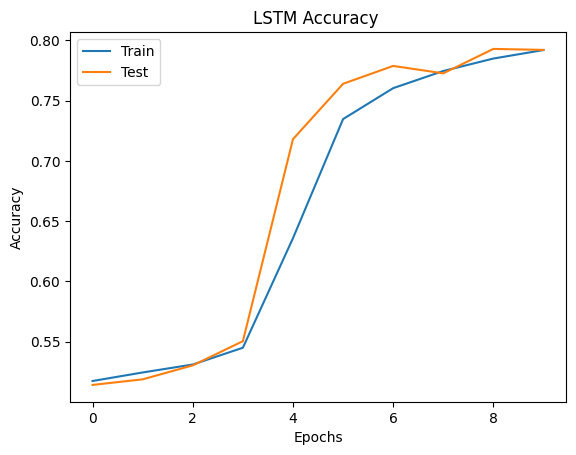

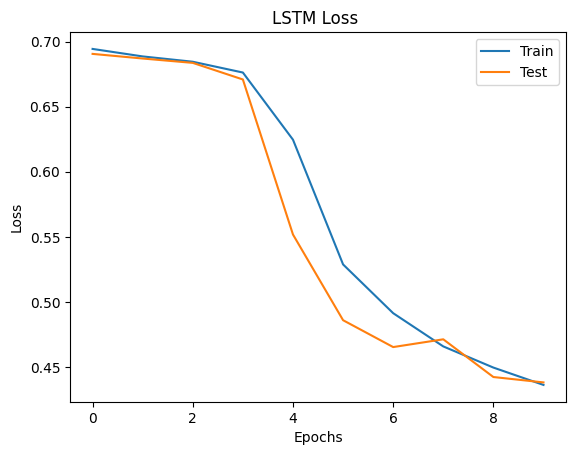

310/310 [==============================] - 2s 6ms/step - loss: 0.4383 - accuracy: 0.7921
Test loss : 0.4383086562156677
Test Accuracy : 0.7920742034912109


In [46]:
#plot et save l'accuracy du lstm
plt.plot(lstm_history.history['accuracy'])
plt.plot(lstm_history.history['val_accuracy'])
plt.title("LSTM Accuracy ")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(['Train','Test'],loc='best')
plt.savefig("lstmacc.png")
plt.show()

#plot et save la loss du lstm
plt.plot(lstm_history.history['loss'])
plt.plot(lstm_history.history['val_loss'])
plt.title("LSTM Loss ")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(['Train','Test'],loc='best')
plt.savefig("lstmloss.png")
plt.show()

score_lstm = lstm.evaluate(X_test,y_test)
print("Test loss :",score_lstm[0])
print("Test Accuracy :",score_lstm[1])


In [47]:
lstm.save("lstm_model.h5")

In [48]:
# fonction de prédiction
#Etant fournie le chemin du modèle avec celui du tokenizer il applique le modèle sur le text
#Pour fournir comme résultat si la sentence était positive ou négative et sa proba
def predict_method(modelPath, tokenizerPath, text):
    with open(tokenizerPath, 'rb') as token:
        tokenizer = pickle.load(token)

    model = keras.models.load_model(modelPath)
    #Traitement du text
    textseq = tokenizer.texts_to_sequences([text])
    textpad = pad_sequences(textseq, maxlen=1000)
    
    proba = model.predict(text_padded)[0][0]
    if proba >= 0.5:
        sentiment = "positive"
    else:
        sentiment = "negative"

    print("this sentence is {} with a probability of {}".format(sentiment, proba))

In [49]:
!pip install keras-tcn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.3 MB/s eta 0:00:0000:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 23.4.0 requires cupy-cuda11x<12.0.0a0,>=9.5.0, which is not installed.
onnx 1.13.1 requires protobuf<4,>=3.20.2, but you have protobuf 3.19.6 which is incompatible.
kfp 1.8.20 requires google-api-python-client<2,>=1.7.8, but you have google-api-python-client 2.86.0 which is incompatible.
kfp 1.8.20 requires PyYAML<6,>=5.3, but you have pyyaml 6.0 which is incompatible.
gcsfs 2023.3.0 requires fsspec==2023.3.0, but you have fsspec 2023.4.0 which is incompatible.
cudf 23.4.0 requires protobuf<4.22,>=4.21.6, but you have protobuf 3.19.6 which is incompatible.
beatrix-ju

In [50]:
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D
from keras.callbacks import EarlyStopping
vec_size = 300
# Reseau de convolution 1D
conv_model = Sequential()
conv_model.add(Embedding(input_dim=vocab_size, output_dim=vec_size, input_length=maxlen))
conv_model.add(Conv1D(256, 3, activation='relu', strides=1))
conv_model.add(Dropout(0.20))
conv_model.add(GlobalMaxPooling1D())
conv_model.add(Dense(units=1, activation='sigmoid'))
conv_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
history = conv_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, callbacks=[early_stop])

Epoch 1/3
1240/1240 [==============================] - 64s 49ms/step - loss: 0.3449 - accuracy: 0.8469 - val_loss: 0.2887 - val_accuracy: 0.8798
Epoch 2/3
1240/1240 [==============================] - 19s 15ms/step - loss: 0.1573 - accuracy: 0.9416 - val_loss: 0.2880 - val_accuracy: 0.8809
Epoch 3/3
1240/1240 [==============================] - 16s 13ms/step - loss: 0.0413 - accuracy: 0.9885 - val_loss: 0.3340 - val_accuracy: 0.8825


In [51]:
conv_model.save("conv_model.h5")

In [52]:
# Réseau TCN
from tcn import TCN
vec_size = 300
tcn_model = Sequential()
tcn_model.add(Embedding(input_dim=vocab_size, output_dim=vec_size, input_length=maxlen ,trainable = False))
tcn_model.add(TCN(256, 3, activation='relu'))
tcn_model.add(Dropout(0.20))
tcn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
tcn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
tcn_history = tcn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1240/1240 [==============================] - 55s 27ms/step - loss: 0.5740 - accuracy: 0.6581 - val_loss: 0.3862 - val_accuracy: 0.8248
Epoch 2/10
1240/1240 [==============================] - 32s 26ms/step - loss: 0.3425 - accuracy: 0.8535 - val_loss: 0.3363 - val_accuracy: 0.8529
Epoch 3/10
1240/1240 [==============================] - 32s 26ms/step - loss: 0.2349 - accuracy: 0.9070 - val_loss: 0.3405 - val_accuracy: 0.8551
Epoch 4/10
1240/1240 [==============================] - 32s 26ms/step - loss: 0.1396 - accuracy: 0.9479 - val_loss: 0.4586 - val_accuracy: 0.8417
Epoch 5/10
1240/1240 [==============================] - 32s 26ms/step - loss: 0.0758 - accuracy: 0.9722 - val_loss: 0.5411 - val_accuracy: 0.8179
Epoch 6/10
1240/1240 [==============================] - 32s 26ms/step - loss: 0.0483 - accuracy: 0.9829 - val_loss: 0.6563 - val_accuracy: 0.8446
Epoch 7/10
1240/1240 [==============================] - 32s 26ms/step - loss: 0.0481 - accuracy: 0.9825 - val_loss: 0.6045 -

In [53]:
tcn_model.save("tcn_model.h5")

In [54]:
vec_size = 200
#BILSTM not tested
bi_lstm =Sequential()
# Embedding layer
bi_lstm.add(Embedding(input_dim = vocab_size, output_dim = vec_size,input_length=maxlen,trainable = False))
#lstm
bi_lstm.add(Bidirectional(LSTM(200, dropout=0.2, recurrent_dropout=0.2)))
bi_lstm.add(Dense(1,activation='sigmoid'))

In [55]:
bi_lstm.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
bi_lstm_history = bi_lstm.fit(X_train,y_train,epochs=30,validation_data=(X_test,y_test))

Epoch 1/30
  51/1240 [>.............................] - ETA: 15:02 - loss: 0.6903 - accuracy: 0.5319

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

plt.plot(bi_lstm_history.history['accuracy'])
plt.plot(bi_lstm_history.history['val_accuracy'])
plt.title("Bi-LSTM Accuracy ")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(['Train','Test'],loc='best')
plt.show()


plt.plot(bi_lstm_history.history['loss'])
plt.plot(bi_lstm_history.history['val_loss'])
plt.title("Bi-LSTM Loss ")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(['Train','Test'],loc='best')
plt.show()

In [ ]:
score_bilstm = bi_lstm.evaluate(X_test,y_test)

print("Test Loss :",score_bilstm[0])
print("Test Accuracy :",score_bilstm[1])